# Building A Netflix Recommender System

Content Based Recommender System recommends movies similar to the movie user likes

In [73]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [74]:
df_1=pd.read_csv('movie_metadata.csv')

In [75]:
df_1.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [76]:
df_1.shape

(5043, 28)

In [77]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [78]:
df_1.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

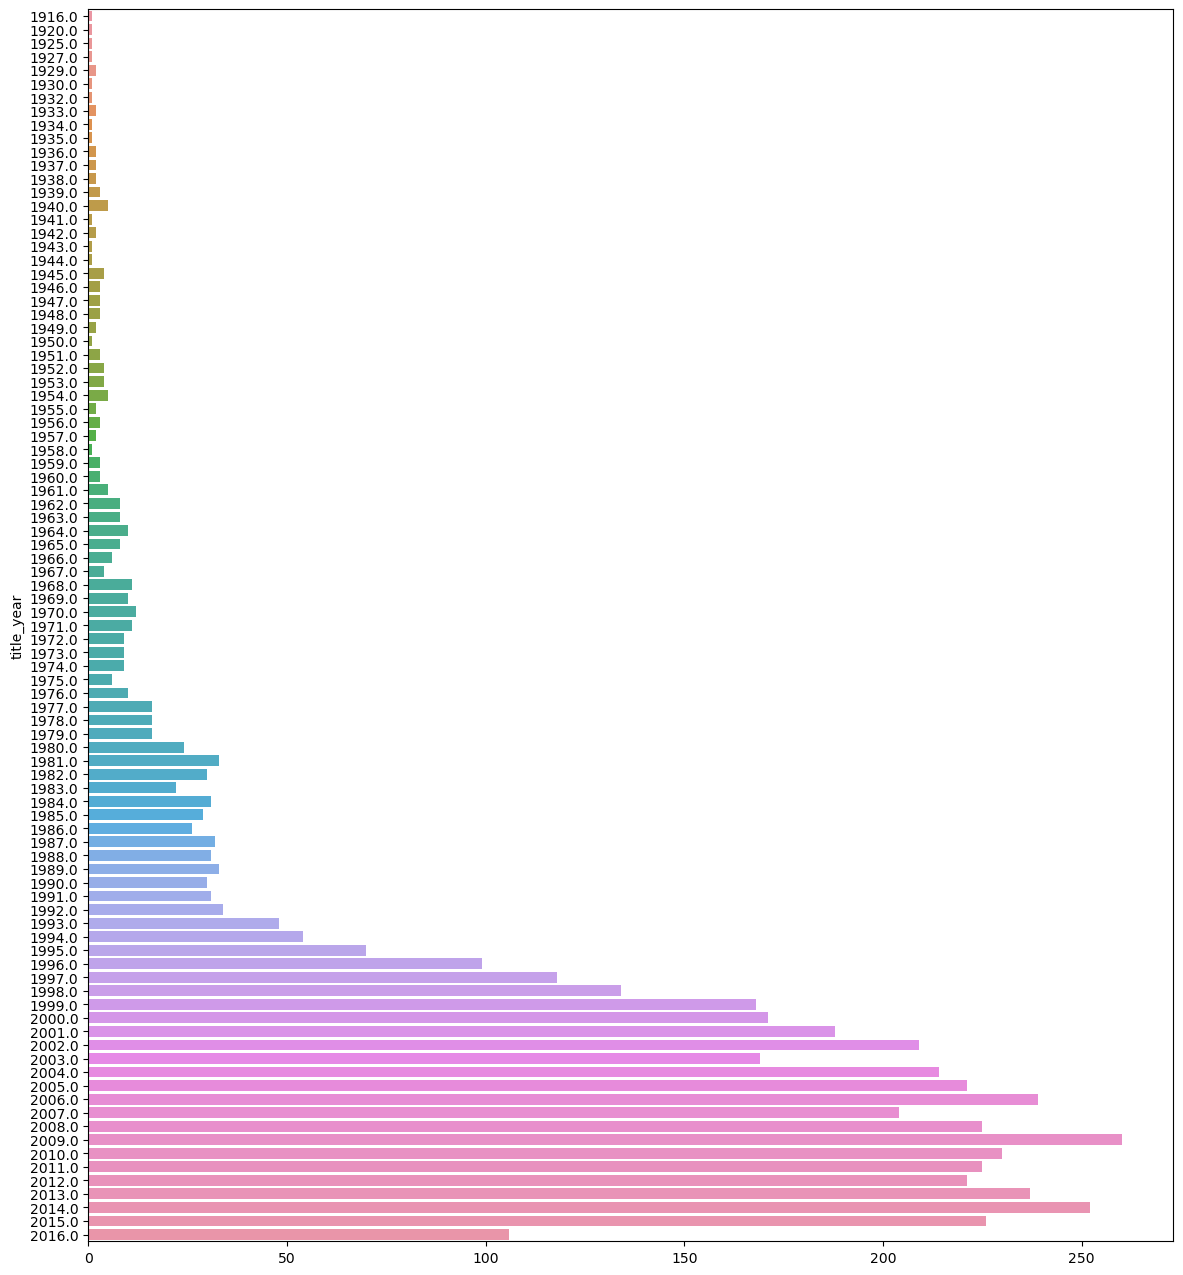

In [79]:
movies_year=df_1['title_year'].value_counts()
movies_year=movies_year.sort_index(ascending=False)

plt.figure(figsize=(14,16))

sns.barplot(y=movies_year.index,x=movies_year.values,orient='h')

plt.xticks()
plt.show()

In [80]:
#Extracting Import feature
movies_1=df_1[['movie_title','genres','director_name','actor_1_name','actor_2_name','actor_3_name']].copy()


In [81]:
movies_1.head(20)

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport
2,Spectre,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman
3,The Dark Knight Rises,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
4,Star Wars: Episode VII - The Force Awakens ...,Documentary,Doug Walker,Doug Walker,Rob Walker,NaN
5,John Carter,Action|Adventure|Sci-Fi,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker
6,Spider-Man 3,Action|Adventure|Romance,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst
7,Tangled,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey
8,Avengers: Age of Ultron,Action|Adventure|Sci-Fi,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson
9,Harry Potter and the Half-Blood Prince,Adventure|Family|Fantasy|Mystery,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint


In [82]:
movies_1.isna().sum()

movie_title        0
genres             0
director_name    104
actor_1_name       7
actor_2_name      13
actor_3_name      23
dtype: int64

In [83]:
movies_1['director_name']=movies_1['director_name'].replace(np.nan,'unknown')
movies_1['actor_1_name']=movies_1['actor_1_name'].replace(np.nan,'unknown')
movies_1['actor_2_name']=movies_1['actor_2_name'].replace(np.nan,'unknown')
movies_1['actor_3_name']=movies_1['actor_3_name'].replace(np.nan,'unknown')

In [84]:
movies_1.isna().sum()

movie_title      0
genres           0
director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
dtype: int64

In [85]:
movies_1['movie_title'][1][:-1]

"Pirates of the Caribbean: At World's End"

In [86]:
movies_1['genres'][1]

'Action|Adventure|Fantasy'

In [87]:
movies_1['director_name'][1]

'Gore Verbinski'

In [88]:
movies_1['actor_1_name'][1]

'Johnny Depp'

In [89]:
#in the movie title there is a null terminating character.Getting rid of it 

movies_1['movie_title']=movies_1['movie_title'].apply(lambda x : x[:-1])

In [90]:
#Data preprocessing

In [91]:
movies_1['movie_title']=movies_1['movie_title'].apply(lambda x: str.lower(x))

In [ ]:
#getting rid of '|' in genre

In [94]:
movies_1['genres']=movies_1['genres'].apply(lambda x: str.replace(x,'|',' '))

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,avatar,Action Adventure Fantasy Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi
1,pirates of the caribbean: at world's end,Action Adventure Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport
2,spectre,Action Adventure Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman
3,the dark knight rises,Action Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
4,star wars: episode vii - the force awakens ...,Documentary,Doug Walker,Doug Walker,Rob Walker,unknown


In [96]:
#Saving the cleaned file 
movies_1.to_csv('Movies_till_2016.csv')

## Working on second dataset

In [98]:
df_2=pd.read_csv('movies_metadata.csv',low_memory=False)

In [101]:
df_2.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [102]:
df_cred=pd.read_csv('credits.csv')

In [103]:
df_cred.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [171]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
#release date-in datetime format

In [177]:
df_2['release_date']=pd.to_datetime(df_2['release_date'],errors='coerce')

#errors='coerce' : if there is any error while parsing than that will be replaced by nan

In [180]:
df_2['year']=df_2['release_date'].apply(lambda x: x.year)

In [190]:
#Since we do already have data till 2016, we need data after that 

print(df_2[df_2['year']==2017].shape)
print(df_2[df_2['year']==2018].shape)
print(df_2[df_2['year']==2019].shape)
print(df_2[df_2['year']==2020].shape)

(532, 25)
(5, 25)
(0, 25)
(1, 25)


In [191]:
#We don.t have enough data after 2017, so we will only take data of 2017 and and try to get rest from other source

In [192]:
movies_2=(df_2[df_2['year']==2017]).copy()

In [195]:
movies_2.shape

(532, 25)

In [204]:
movies_2.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
26560,False,"{'id': 295, 'name': 'Pirates of the Caribbean ...",230000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://pirates.disney.com/pirates-of-the-carib...,166426,tt1790809,en,Pirates of the Caribbean: Dead Men Tell No Tales,"Thrust into an all-new paycheck, a down-on-his...",...,794191988.0,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pirates of the Caribbean: Dead Men Tell No Tales,False,6.6,2814.0,2017


In [202]:
#id should be integer

movies_2['id']=movies_2['id'].astype(int)
movies_2['year']=movies_2['year'].astype(int)

In [203]:
movies_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 26560 to 45465
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  532 non-null    object        
 1   belongs_to_collection  41 non-null     object        
 2   budget                 532 non-null    object        
 3   genres                 532 non-null    object        
 4   homepage               222 non-null    object        
 5   id                     532 non-null    int32         
 6   imdb_id                531 non-null    object        
 7   original_language      532 non-null    object        
 8   original_title         532 non-null    object        
 9   overview               520 non-null    object        
 10  popularity             532 non-null    object        
 11  poster_path            530 non-null    object        
 12  production_companies   532 non-null    object        
 13  prod

In [ ]:
#we will only keep the required columns and drop the rest

In [205]:
movies_new=(movies_2[['title','genres','id','year']]).copy()


In [206]:
movies_new.head(1)

,title,genres,id,year
26560,Pirates of the Caribbean: Dead Men Tell No Tales,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,2017


In [412]:
#Both dataset have common column id on which both datset will be merged

In [413]:
movie_new=pd.merge(movies_new,df_cred,on='id')

In [414]:
movie_new.head()

,title,genres,id,year,cast,crew
0,Pirates of the Caribbean: Dead Men Tell No Tales,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,2017,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de..."
1,Justice League,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,2017,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'de..."
2,Thor: Ragnarok,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,2017,"[{'cast_id': 0, 'character': 'Thor Odinson', '...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'de..."
3,Guardians of the Galaxy Vol. 2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,2017,"[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de..."
4,The King's Daughter,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,2017,"[{'cast_id': 0, 'character': 'King Louis XIV',...","[{'credit_id': '5431de49c3a36825d300007e', 'de..."


In [415]:
movie_new.isna().sum()

title     0
genres    0
id        0
year      0
cast      0
crew      0
dtype: int64

In [416]:
print(movie_new['genres'][0])

[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 14, 'name': 'Fantasy'}, {'id': 35, 'name': 'Comedy'}]


In [417]:
print(movie_new['cast'][0])

[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe4c9cc3a36847f8236a53', 'gender': 2, 'id': 85, 'name': 'Johnny Depp', 'order': 0, 'profile_path': '/kbWValANhZI8rbWZXximXuMN4UN.jpg'}, {'cast_id': 9, 'character': 'Captain Armando Salazar', 'credit_id': '54db4949c3a368122d0017fe', 'gender': 2, 'id': 3810, 'name': 'Javier Bardem', 'order': 1, 'profile_path': '/grBOK7Ep09JBE3H5LyV5JaZZ1XZ.jpg'}, {'cast_id': 16, 'character': 'Captain Hector Barbossa', 'credit_id': '54e44e5ec3a368454b00a02f', 'gender': 2, 'id': 118, 'name': 'Geoffrey Rush', 'order': 2, 'profile_path': '/5h91WHSK80YtqTk1bMiar2IZzO2.jpg'}, {'cast_id': 7, 'character': 'Henry Turner', 'credit_id': '54db49359251415a0d0012a0', 'gender': 2, 'id': 1017347, 'name': 'Brenton Thwaites', 'order': 3, 'profile_path': '/dM0m0OxREfW4HxwV2qQeitS8dfO.jpg'}, {'cast_id': 8, 'character': 'Carina Smyth', 'credit_id': '54db493e925141618f00189a', 'gender': 1, 'id': 115150, 'name': 'Kaya Scodelario', 'order': 4, 'profile_path': 

In [418]:
print(movie_new['crew'][0])

[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', 'gender': 2, 'id': 770, 'job': 'Producer', 'name': 'Jerry Bruckheimer', 'profile_path': '/lQu9eRzRX264j2LFQwvKC50wb9s.jpg'}, {'credit_id': '592f443cc3a3685cf7000019', 'department': 'Writing', 'gender': 2, 'id': 1705, 'job': 'Characters', 'name': 'Ted Elliott', 'profile_path': '/9OXGC59dpVDdfwSeEdHgxpoHXVu.jpg'}, {'credit_id': '591298d6c3a36864fc04d1a4', 'department': 'Production', 'gender': 2, 'id': 1706, 'job': 'Executive Producer', 'name': 'Terry Rossio', 'profile_path': '/zvlhzykondhUf26gknMo8hLMuCn.jpg'}, {'credit_id': '52fe4c9cc3a36847f8236a5f', 'department': 'Writing', 'gender': 2, 'id': 1706, 'job': 'Characters', 'name': 'Terry Rossio', 'profile_path': '/zvlhzykondhUf26gknMo8hLMuCn.jpg'}, {'credit_id': '591298289251414e8904f223', 'department': 'Writing', 'gender': 2, 'id': 1706, 'job': 'Story', 'name': 'Terry Rossio', 'profile_path': '/zvlhzykondhUf26gknMo8hLMuCn.jpg'}, {'credit_id': '592f4472c3a3685c9f000055

In [419]:
#In Genres, cast and crew we need to extract the useful data
#In all these the data is dicitionary as string 

In [420]:
import ast 

In [421]:
movie_new['genres']=movie_new['genres'].apply(lambda x: ast.literal_eval(x))
movie_new['cast']=movie_new['cast'].apply(lambda x: ast.literal_eval(x))
movie_new['crew']=movie_new['crew'].apply(lambda x: ast.literal_eval(x))

In [422]:
movie_new.head(1)

,title,genres,id,year,cast,crew
0,Pirates of the Caribbean: Dead Men Tell No Tales,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,2017,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de..."


In [423]:
def genre_ext(data):
    
    gen=[]
    for x in range(len(data)):
        
        tem=data[x]['name']
        
        
        if tem=='Science Fiction':
            
            tem1='Sci-Fi'        
        
            gen.append(tem1)
            
        else:
            gen.append(tem)
        
        
    return gen
        
        
        

In [424]:
movie_new['genres']=movie_new['genres'].apply(genre_ext)

In [425]:
movie_new.head(2)

,title,genres,id,year,cast,crew
0,Pirates of the Caribbean: Dead Men Tell No Tales,"[Adventure, Action, Fantasy, Comedy]",166426,2017,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de..."
1,Justice League,"[Action, Adventure, Fantasy, Sci-Fi]",141052,2017,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'de..."


In [426]:
movie_new['cast'][0]

[{'cast_id': 1,
  'character': 'Captain Jack Sparrow',
  'credit_id': '52fe4c9cc3a36847f8236a53',
  'gender': 2,
  'id': 85,
  'name': 'Johnny Depp',
  'order': 0,
  'profile_path': '/kbWValANhZI8rbWZXximXuMN4UN.jpg'},
 {'cast_id': 9,
  'character': 'Captain Armando Salazar',
  'credit_id': '54db4949c3a368122d0017fe',
  'gender': 2,
  'id': 3810,
  'name': 'Javier Bardem',
  'order': 1,
  'profile_path': '/grBOK7Ep09JBE3H5LyV5JaZZ1XZ.jpg'},
 {'cast_id': 16,
  'character': 'Captain Hector Barbossa',
  'credit_id': '54e44e5ec3a368454b00a02f',
  'gender': 2,
  'id': 118,
  'name': 'Geoffrey Rush',
  'order': 2,
  'profile_path': '/5h91WHSK80YtqTk1bMiar2IZzO2.jpg'},
 {'cast_id': 7,
  'character': 'Henry Turner',
  'credit_id': '54db49359251415a0d0012a0',
  'gender': 2,
  'id': 1017347,
  'name': 'Brenton Thwaites',
  'order': 3,
  'profile_path': '/dM0m0OxREfW4HxwV2qQeitS8dfO.jpg'},
 {'cast_id': 8,
  'character': 'Carina Smyth',
  'credit_id': '54db493e925141618f00189a',
  'gender': 1,
  '

In [427]:
#this function will extract the list of 3 actors from cast

def cast_ext(data):
    
    cast=[]
    
    if len(data) < 3 :
    
        for x in range(len(data)):

            tem=data[x]['name']

            cast.append(tem)
            
            
    else:
        for x in range(3):
            
            tem=data[x]['name']

            cast.append(tem)
            
        
        
    return cast
        
        
        

In [428]:
cast_ext(mo)

['Johnny Depp', 'Javier Bardem', 'Geoffrey Rush']

In [429]:
movie_new['Actors_list']=movie_new['cast'].apply(cast_ext)

In [430]:
movie_new.head(2)

,title,genres,id,year,cast,crew,Actors_list
0,Pirates of the Caribbean: Dead Men Tell No Tales,"[Adventure, Action, Fantasy, Comedy]",166426,2017,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de...","[Johnny Depp, Javier Bardem, Geoffrey Rush]"
1,Justice League,"[Action, Adventure, Fantasy, Sci-Fi]",141052,2017,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'de...","[Ben Affleck, Henry Cavill, Gal Gadot]"


In [431]:
(movie_new['crew'][0])

[{'credit_id': '52fe4c9cc3a36847f8236a65',
  'department': 'Production',
  'gender': 2,
  'id': 770,
  'job': 'Producer',
  'name': 'Jerry Bruckheimer',
  'profile_path': '/lQu9eRzRX264j2LFQwvKC50wb9s.jpg'},
 {'credit_id': '592f443cc3a3685cf7000019',
  'department': 'Writing',
  'gender': 2,
  'id': 1705,
  'job': 'Characters',
  'name': 'Ted Elliott',
  'profile_path': '/9OXGC59dpVDdfwSeEdHgxpoHXVu.jpg'},
 {'credit_id': '591298d6c3a36864fc04d1a4',
  'department': 'Production',
  'gender': 2,
  'id': 1706,
  'job': 'Executive Producer',
  'name': 'Terry Rossio',
  'profile_path': '/zvlhzykondhUf26gknMo8hLMuCn.jpg'},
 {'credit_id': '52fe4c9cc3a36847f8236a5f',
  'department': 'Writing',
  'gender': 2,
  'id': 1706,
  'job': 'Characters',
  'name': 'Terry Rossio',
  'profile_path': '/zvlhzykondhUf26gknMo8hLMuCn.jpg'},
 {'credit_id': '591298289251414e8904f223',
  'department': 'Writing',
  'gender': 2,
  'id': 1706,
  'job': 'Story',
  'name': 'Terry Rossio',
  'profile_path': '/zvlhzykond

In [432]:
movie_new['crew'][0][1]['job']

'Characters'

In [433]:
#this function will extract the list of 3 actors from cast

def dir_ext(data):
    
    dire=[]
    
    
    for x in range(len(data)):

        tem=data[x]['job']
        
        if tem=='Director':
            
            tem_dir=tem=data[x]['name']

            dire.append(tem_dir)
            
        
        else:
            pass
            
            
            
        
        
    return dire
        
        
        

In [434]:
movie_new['Dir_list']=movie_new['crew'].apply(dir_ext)

In [435]:
movie_new.head(1)

,title,genres,id,year,cast,crew,Actors_list,Dir_list
0,Pirates of the Caribbean: Dead Men Tell No Tales,"[Adventure, Action, Fantasy, Comedy]",166426,2017,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de...","[Johnny Depp, Javier Bardem, Geoffrey Rush]","[Joachim Rønning, Espen Sandberg]"


In [436]:
movie_new.isna().sum()

title          0
genres         0
id             0
year           0
cast           0
crew           0
Actors_list    0
Dir_list       0
dtype: int64

In [437]:
movie_new['cast'][32]

[]

In [438]:
movie_new.drop(['cast','crew'],inplace=True,axis=1)

In [439]:
movie_new.head()

,title,genres,id,year,Actors_list,Dir_list
0,Pirates of the Caribbean: Dead Men Tell No Tales,"[Adventure, Action, Fantasy, Comedy]",166426,2017,"[Johnny Depp, Javier Bardem, Geoffrey Rush]","[Joachim Rønning, Espen Sandberg]"
1,Justice League,"[Action, Adventure, Fantasy, Sci-Fi]",141052,2017,"[Ben Affleck, Henry Cavill, Gal Gadot]",[Zack Snyder]
2,Thor: Ragnarok,"[Action, Adventure, Fantasy, Sci-Fi]",284053,2017,"[Chris Hemsworth, Tom Hiddleston, Cate Blanchett]",[Taika Waititi]
3,Guardians of the Galaxy Vol. 2,"[Action, Adventure, Comedy, Sci-Fi]",283995,2017,"[Chris Pratt, Zoe Saldana, Dave Bautista]",[James Gunn]
4,The King's Daughter,"[Fantasy, Action, Adventure]",245842,2017,"[Pierce Brosnan, William Hurt, Benjamin Walker]",[Sean McNamara]


In [440]:
#Let's Format this dataset just like the datset 1
#movie_title	genres	director_name	actor_1_name	actor_2_name	actor_3_name

In [456]:
movie_new.isna().sum()

title          0
genres         0
id             0
year           0
Actors_list    0
Dir_list       0
com_actor      0
dtype: int64

In [449]:
movie_new['com_actor']=movie_new['Actors_list'].apply(lambda x: ' '.join(x))

In [459]:
movie_new.tail(3)

,title,genres,id,year,Actors_list,Dir_list,com_actor
528,In a Heartbeat,"[Family, Animation, Romance, Comedy]",455661,2017,[],"[Beth David, Esteban Bravo]",
529,Mom,"[Crime, Drama, Thriller]",404604,2017,"[Sridevi Kapoor, Sajal Ali, Akshaye Khanna]",[Ravi Udyawar],Sridevi Kapoor Sajal Ali Akshaye Khanna
530,Queerama,[],461257,2017,[],[Daisy Asquith],


In [460]:
movie_new['actor_1_name']=movie_new['Actors_list'].apply(lambda x: x[0] if len(x)>0 else 'unknown')

In [462]:
movie_new[movie_new['actor_1_name']=='unknown']

,title,genres,id,year,Actors_list,Dir_list,com_actor,actor_1_name
32,Kiki,[Documentary],373480,2017,[],[Sara Jordenö],,unknown
80,Machines,[Documentary],433086,2017,[],[Rahul Jain],,unknown
103,The Man Who Was Too Free,[Documentary],437372,2017,[],[Вера Кричевская],,unknown
114,The Citizen,[Drama],436279,2017,[],[Roland Vranik],,unknown
140,Oklahoma City,[Documentary],433056,2017,[],[Barak Goodman],,unknown
269,Boiling Point,[Documentary],442640,2017,[],[Elina Hirvonen],,unknown
285,Uncertain,[Documentary],333295,2017,[],"[Anna Sandilands, Ewan McNicol]",,unknown
364,Warning: This Drug May Kill You,"[TV Movie, Documentary]",452372,2017,[],[Perri Peltz],,unknown
367,Hasan Minhaj: Homecoming King,[Comedy],458310,2017,[],[Christopher Storer],,unknown
370,Three heroes and the King of the Sea,[],446850,2017,[],[],,unknown


In [463]:
movie_new['actor_2_name']=movie_new['Actors_list'].apply(lambda x: x[1] if len(x)>1 else 'unknown')

In [464]:
movie_new['actor_3_name']=movie_new['Actors_list'].apply(lambda x: x[2] if len(x)>2 else 'unknown')

In [469]:
movie_new.tail(3)

,title,genres,id,year,Actors_list,Dir_list,com_actor,actor_1_name,actor_2_name,actor_3_name,Genres,director_name
528,In a Heartbeat,"[Family, Animation, Romance, Comedy]",455661,2017,[],"[Beth David, Esteban Bravo]",,unknown,unknown,unknown,Family Animation Romance Comedy,Beth David Esteban Bravo
529,Mom,"[Crime, Drama, Thriller]",404604,2017,"[Sridevi Kapoor, Sajal Ali, Akshaye Khanna]",[Ravi Udyawar],Sridevi Kapoor Sajal Ali Akshaye Khanna,Sridevi Kapoor,Sajal Ali,Akshaye Khanna,Crime Drama Thriller,Ravi Udyawar
530,Queerama,[],461257,2017,[],[Daisy Asquith],,unknown,unknown,unknown,,Daisy Asquith


In [466]:
movie_new['Genres']=movie_new['genres'].apply(lambda x: ' '.join(x)) 

In [468]:
movie_new['director_name']=movie_new['Dir_list'].apply(lambda x: ' '.join(x))

In [470]:
movie_2_fin=(movie_new[['title','Genres','director_name','actor_1_name','actor_2_name','actor_3_name','com_actor']]).copy()

In [476]:
movie_2_fin.head()

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name,comb
0,pirates of the caribbean: dead men tell no tales,Adventure Action Fantasy Comedy,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Johnny Depp Javier Bardem Geoffrey Rush
1,justice league,Action Adventure Fantasy Sci-Fi,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Ben Affleck Henry Cavill Gal Gadot
2,thor: ragnarok,Action Adventure Fantasy Sci-Fi,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Chris Hemsworth Tom Hiddleston Cate Blanchett
3,guardians of the galaxy vol. 2,Action Adventure Comedy Sci-Fi,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Chris Pratt Zoe Saldana Dave Bautista
4,the king's daughter,Fantasy Action Adventure,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Pierce Brosnan William Hurt Benjamin Walker


In [473]:
movie_2_fin.rename(columns={'title':'movie_title','Genres':'genres','com_actor':'comb'},inplace=True)

In [475]:
movie_2_fin['movie_title']=movie_2_fin['movie_title'].apply(lambda x: str.lower(x))

In [494]:
movie_2_fin[movie_2_fin['director_name']=='']

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name,comb


In [487]:
movie_2_fin.iloc[13,2]='Paul Thomas Anderson'

In [489]:
movie_2_fin.iloc[370,2]='Konstantin Feoktistov'

In [491]:
movie_2_fin.iloc[383,2]='Alexei Navalny'

In [493]:
movie_2_fin.iloc[513,2]='Lesley Gardiner'

In [501]:
movie_2_fin.head()

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name,combined
0,pirates of the caribbean: dead men tell no tales,Adventure Action Fantasy Comedy,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Johnny Depp Javier Bardem Geoffrey Rush Joachi...
1,justice league,Action Adventure Fantasy Sci-Fi,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Ben Affleck Henry Cavill Gal Gadot Zack Snyder...
2,thor: ragnarok,Action Adventure Fantasy Sci-Fi,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Chris Hemsworth Tom Hiddleston Cate Blanchett ...
3,guardians of the galaxy vol. 2,Action Adventure Comedy Sci-Fi,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Chris Pratt Zoe Saldana Dave Bautista James Gu...
4,the king's daughter,Fantasy Action Adventure,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Pierce Brosnan William Hurt Benjamin Walker Se...


In [498]:
#Combining genres and director_name in comb as well

movie_2_fin['combined']=movie_2_fin['comb']+' '+movie_2_fin['director_name']+' '+movie_2_fin['genres']

In [500]:
movie_2_fin.drop(['comb'],inplace=True,axis=1)

In [503]:
#Saving the clean file

movie_2_fin.to_csv('movie_2017_clean.csv')

In [504]:
#add combined column in older dataset as well
movies_1.head()


,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,avatar,Action Adventure Fantasy Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi
1,pirates of the caribbean: at world's end,Action Adventure Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport
2,spectre,Action Adventure Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman
3,the dark knight rises,Action Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
4,star wars: episode vii - the force awakens ...,Documentary,Doug Walker,Doug Walker,Rob Walker,unknown


In [513]:
movies_1[movies_1['director_name']=='unknown']

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name
177,miami vice,Action Crime Drama Mystery Thriller,unknown,Don Johnson,Philip Michael Thomas,John Diehl
260,the a-team,Action Adventure Crime,unknown,George Peppard,Dirk Benedict,Dwight Schultz
404,hannibal,Crime Drama Horror Mystery Thriller,unknown,Caroline Dhavernas,Scott Thompson,Hettienne Park
459,daredevil,Action Adventure Crime Drama Sci-Fi Thriller,unknown,Elden Henson,Royce Johnson,Charlie Cox
479,bewitched,Comedy Family Fantasy,unknown,Elizabeth Montgomery,Agnes Moorehead,Dick York
...,...,...,...,...,...,...
4798,heroes,Drama Fantasy Sci-Fi Thriller,unknown,Sendhil Ramamurthy,Masi Oka,Greg Grunberg
4803,home movies,Animation Comedy Drama,unknown,Brendon Small,Ron Lynch,Melissa Bardin Galsky
4819,revolution,Action Adventure Drama Sci-Fi,unknown,Billy Burke,Tracy Spiridakos,David Lyons
4869,happy valley,Crime Drama,unknown,Shirley Henderson,James Norton,Sarah Lancashire


In [ ]:
movies_1['combined']=movies_1['combined']

In [516]:
def combine(data):
    tem=''
    
    g=data[0]
    d=data[1]
    a1=data[2]
    a2=data[3]
    a3=data[4]
    
    if a1=='unknown':
        pass
    else:
        tem=tem+' '+a1
        
    if a2=='unknown':
        pass
    else:
        tem=tem+' '+a2
        
    if a3=='unknown':
        pass
    else:
        tem=tem+' '+a3
        
    if d=='unknown':
        pass
    else:
        tem=tem+' '+d
        
    if g=='unknown':
        pass
    else:
        tem=tem+' '+g
        
        
    return tem
        
        

In [515]:
movies_1.columns

Index(['movie_title', 'genres', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name'],
      dtype='object')

In [517]:
movies_1['combined']=movies_1[['genres','director_name','actor_1_name','actor_2_name','actor_3_name']].apply(combine,axis=1)

In [522]:
movies_1.head()

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name,combined
0,avatar,Action Adventure Fantasy Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,CCH Pounder Joel David Moore Wes Studi James ...
1,pirates of the caribbean: at world's end,Action Adventure Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Johnny Depp Orlando Bloom Jack Davenport Gore...
2,spectre,Action Adventure Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Christoph Waltz Rory Kinnear Stephanie Sigman...
3,the dark knight rises,Action Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Tom Hardy Christian Bale Joseph Gordon-Levitt...
4,star wars: episode vii - the force awakens ...,Documentary,Doug Walker,Doug Walker,Rob Walker,unknown,Doug Walker Rob Walker Doug Walker Documentary


In [759]:
movies_1.to_csv('movies_till_2016_clean.csv')

In [525]:
movies_1.columns

Index(['movie_title', 'genres', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'combined'],
      dtype='object')

In [526]:
movie_2_fin.columns

Index(['movie_title', 'genres', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'combined'],
      dtype='object')

In [528]:
# all dataset untill 2017 together

movies_comb=pd.concat([movies_1,movie_2_fin],axis=0,ignore_index=True)



In [535]:
movies_comb.tail()

,index,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name,combined
5569,5569,thick lashes of lauri mäntyvaara,Romance Comedy,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Inka Haapamäki Rosa Honkonen Tiitus Rantala Ha...
5570,5570,cop and a half: new recruit,Crime Comedy Action Family,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Lou Diamond Phillips Wallace Shawn Gina Holden...
5571,5571,in a heartbeat,Family Animation Romance Comedy,Beth David Esteban Bravo,unknown,unknown,unknown,Beth David Esteban Bravo Family Animation Rom...
5572,5572,mom,Crime Drama Thriller,Ravi Udyawar,Sridevi Kapoor,Sajal Ali,Akshaye Khanna,Sridevi Kapoor Sajal Ali Akshaye Khanna Ravi U...
5573,5573,queerama,,Daisy Asquith,unknown,unknown,unknown,Daisy Asquith


In [533]:
movies_comb.reset_index(inplace=True)

In [536]:
movies_comb.drop('index',inplace=True,axis=1)

In [537]:
movies_comb.shape

(5574, 7)

## Getting the list of movies after 2017

In [538]:
df_3=pd.read_csv('data.csv')

In [540]:
df_3.head(2)

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."


In [542]:
df_3.shape

(10000, 13)

In [543]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10000 non-null  int64  
 1   Movie Name           10000 non-null  object 
 2   Year of Release      10000 non-null  int64  
 3   Run Time in minutes  10000 non-null  int64  
 4   Movie Rating         10000 non-null  float64
 5   Votes                10000 non-null  int64  
 6   MetaScore            7974 non-null   float64
 7   Gross                7085 non-null   float64
 8   Genre                10000 non-null  object 
 9   Certification        9631 non-null   object 
 10  Director             10000 non-null  object 
 11  Stars                10000 non-null  object 
 12  Description          10000 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1015.8+ KB


In [549]:
new=(df_3[df_3['Year of Release']>2017]).copy()

In [550]:
new.shape

(1600, 13)

In [654]:
#Kepping the useful feature 
movie_3=(new[['Movie Name','Genre','Stars','Director','Year of Release']]).copy()

In [655]:
movie_3.reset_index(inplace=True)

In [656]:
movie_3.head(2)

,index,Movie Name,Genre,Stars,Director,Year of Release
0,10,Daman,"['Adventure', ' Drama']","['Karan Kandhapan', 'Babushan Mohanty', 'Dipan...","['Lenka Debiprasad', 'Vishal Mourya']",2022
1,12,Demon Slayer: Kimetsu no Yaiba - Tsuzumi Mansi...,"['Animation', ' Action', ' Fantasy']",[],['Haruo Sotozaki'],2021


In [657]:
movie_3.drop('index',inplace=True,axis=1)

In [658]:
movie_3.isna().sum()

Movie Name         0
Genre              0
Stars              0
Director           0
Year of Release    0
dtype: int64

In [659]:
movie_3[movie_3['Genre']=='[]']

,Movie Name,Genre,Stars,Director,Year of Release


In [660]:
movie_3[movie_3['Stars']=='[]']

,Movie Name,Genre,Stars,Director,Year of Release
1,Demon Slayer: Kimetsu no Yaiba - Tsuzumi Mansi...,"['Animation', ' Action', ' Fantasy']",[],['Haruo Sotozaki'],2021
4,Demon Slayer: Kimetsu no Yaiba - Mt. Natagumo Arc,"['Animation', ' Action', ' Fantasy']",[],['Haruo Sotozaki'],2020


In [661]:
#Genre,Stars,Director are the columns which is string of list 
#apply eval()

In [662]:
movie_3['Genre']=movie_3['Genre'].apply(lambda x: ast.literal_eval(x))

In [663]:
movie_3['Stars']=movie_3['Stars'].apply(lambda x: ast.literal_eval(x))

In [664]:
movie_3['Director']=movie_3['Director'].apply(lambda x: ast.literal_eval(x))

In [666]:
movie_3['actor_1_name']=movie_3['Stars'].apply(lambda x: x[0] if len(x) > 0 else '')

In [667]:
movie_3['actor_2_name']=movie_3['Stars'].apply(lambda x: x[1] if len(x) > 1 else '')

In [668]:
movie_3['actor_3_name']=movie_3['Stars'].apply(lambda x: x[2] if len(x) > 2 else '')

In [669]:
#Director Column 
movie_3['director_name']=movie_3['Director'].apply(lambda x: ' '.join(x))


In [670]:
#Genre_column
movie_3['genres']=movie_3['Genre'].apply(lambda x: ''.join(x))


In [671]:
#Creating the combined column

In [672]:
def com(data):
    tem=''
    

    a1=data[0]
    a2=data[1]
    a3=data[2]        
    d=data[3]
    g=data[4]
    
    
    if a1=='':
        pass
    else:
        tem=tem+' '+a1
        
    if a2=='':
        pass
    else:
        tem=tem+' '+a2
        
    if a3=='':
        pass
    else:
        tem=tem+' '+a3
        
        
    if a2=='':
        pass
    else:
        tem=tem+' '+a2
        
    if d=='':
        pass
    else:
        tem=tem+' '+d
        
    if g=='':
        pass
    else:
        tem=tem+' '+g
        
        
    return tem
        
        
        
    

In [673]:
movie_3['combined']=movie_3[['actor_1_name','actor_2_name','actor_3_name','director_name','genres']].apply(com,axis=1)

In [683]:
movie_3.head(2)

,movie_title,Genre,Stars,Director,Year of Release,actor_1_name,actor_2_name,actor_3_name,director_name,genres,combined
0,Daman,"[Adventure, Drama]","[Karan Kandhapan, Babushan Mohanty, Dipanwit D...","[Lenka Debiprasad, Vishal Mourya]",2022,Karan Kandhapan,Babushan Mohanty,Dipanwit Dashmohapatra,Lenka Debiprasad Vishal Mourya,Adventure Drama,Karan Kandhapan Babushan Mohanty Dipanwit Das...
1,Demon Slayer: Kimetsu no Yaiba - Tsuzumi Mansi...,"[Animation, Action, Fantasy]",[],[Haruo Sotozaki],2021,,,,Haruo Sotozaki,Animation Action Fantasy,Haruo Sotozaki Animation Action Fantasy


In [682]:
movie_3.rename(columns={'Movie Name':'movie_title'},inplace=True)

In [ ]:
movie_title

In [684]:
movie_after_2017=(movie_3[['movie_title', 'genres', 'director_name', 'actor_1_name','actor_2_name', 'actor_3_name', 'combined']]).copy()

In [686]:
movie_after_2017.head(2)

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name,combined
0,Daman,Adventure Drama,Lenka Debiprasad Vishal Mourya,Karan Kandhapan,Babushan Mohanty,Dipanwit Dashmohapatra,Karan Kandhapan Babushan Mohanty Dipanwit Das...
1,Demon Slayer: Kimetsu no Yaiba - Tsuzumi Mansi...,Animation Action Fantasy,Haruo Sotozaki,,,,Haruo Sotozaki Animation Action Fantasy


In [758]:
movie_after_2017.to_csv('movie_after_2017_clean.csv')

In [688]:
#Combining this to the older dataset
movies_complete=pd.concat([movies_comb,movie_after_2017],axis=0,ignore_index=True)


In [691]:
movies_complete.reset_index(inplace=True)

In [693]:

movies_complete.drop('index',inplace=True,axis=1)
movies_complete.head()

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name,combined
0,avatar,Action Adventure Fantasy Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,CCH Pounder Joel David Moore Wes Studi James ...
1,pirates of the caribbean: at world's end,Action Adventure Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Johnny Depp Orlando Bloom Jack Davenport Gore...
2,spectre,Action Adventure Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Christoph Waltz Rory Kinnear Stephanie Sigman...
3,the dark knight rises,Action Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Tom Hardy Christian Bale Joseph Gordon-Levitt...
4,star wars: episode vii - the force awakens ...,Documentary,Doug Walker,Doug Walker,Rob Walker,unknown,Doug Walker Rob Walker Doug Walker Documentary


In [757]:
#Saving the final list of movies
movies_complete.to_csv('main_data.csv')

### Final Dataset Prepartion is done

## Sentiment Analyser 
1. Our goal is to fetch the reviews of the movies and on basis of that return if the reviews are positive or negative. 
2. we will be using dataset for trainning and creating the model

In [696]:
review=pd.read_csv('reviews.txt', names=['sentiment','comments'], sep='\t' )

In [697]:
review.head()

,sentiment,comments
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [700]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [701]:
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score,accuracy_score
import pickle

In [702]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [727]:
#converting comments into lower case
review['comments']=review['comments'].apply(lambda x : str.lower(x))

In [728]:
review.head()

,sentiment,comments
0,1,the da vinci code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the da vinci code a lot.
3,1,i liked the da vinci code a lot.
4,1,i liked the da vinci code but it ultimatly did...


In [724]:
#removing stop words from comments and creating a model

In [737]:
stop_words=list(stopwords.words('english'))

In [738]:
#Creating model

In [739]:
vectoriser=TfidfVectorizer(use_idf=True,strip_accents='ascii',lowercase=True,stop_words=stop_words)

In [740]:
X=review['comments']


In [749]:
y=review['sentiment']

In [741]:
X=vectoriser.fit_transform(X)

In [742]:
#saving the tranforming model 

pickle.dump(vectoriser,open('transform.pkl','wb'))

In [745]:
X.shape

(6918, 2011)

In [748]:
y

['sentiment']

In [750]:
#Training and testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=111)

In [751]:
model=naive_bayes.MultinomialNB()

In [752]:
model.fit(X_train,y_train)

MultinomialNB()

In [753]:
pred=model.predict(X_test)

In [754]:
accuracy_score(y_test,pred)

0.9780346820809248

In [755]:
#Saving the sentiment predictor model

pickle.dump(model,open('sentiment_model.pkl','wb'))